#### Cross Validation is an important part of machine learning. There are different ways for cross validation. 
We can use it to evaluate:
- what models are more effective
- what parameters to use for a specific model
- selecting features

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# note: sklearn.cross_validation import train_test_split will be deprecated
# note: sklearn.cross_validation import cross_val_score will be deprecated
# note: sklearn.cross_validation import KFold will be deprecated
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn import preprocessing, metrics
from sklearn.svm import SVC

import math, time

#### Model Evaluation Metrics
In order to evaluate each model system, we need to have metrics systems to help us. 
- for classification: the target(s) are category data, so we use ***metrics.accuracy_score*** for measuring
  * **error** - binary classification error rate. It is calculated as # (wrong cases) / #(all casees). Treat predicted values with probability p > 0.5 as positive
  * **merror** - multiclass classification error rate. It is calculated as # (wrong cases) / #(all casees).
- for regression: the target(s) are continuous data. The goal is to ___minimize___ them in the loss functions:
  * **Mean Absolute Error (MAE): metrics.mean_absolute_error** 
  $$mae = \frac{1}{n}\sum_{i=0}^n|y_{i} - \bar{y}_{i}|$$
  * **Mean Square Error (MSE): metics.mean_squared_error **
  $$mse = \frac{1}{n}\sum_{i=0}^n(y_{i} - \bar{y}_{i})^2$$
  * **Root Mean Square Error (RMSE) **
  $$rmse = \sqrt{\frac{1}{n}\sum_{i=0}^n(y_{i} - \bar{y}_{i})^2}$$
  * **Logloss** - negaive log-likelihood 
  * **AUC**  - area under curve          (***Maximize this***)
  * **NDCG** - normalized discounted cumulative gain   (***Maximize this***)
  * **MAP**  - mean average precision                  (***Maximize this***)
- by default, an error metric will be used!

### without cross_validation
- run only once

In [7]:
from sklearn.datasets import load_iris

# fetch data first
X = load_iris().data
y = load_iris().target

# preprocessing data and split it into train and test sets
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)
print("The model score is:", clf.score(X_test, y_test))

The model score is: 0.933333333333


When we do train_test_split, part of the samples are used for testing. However, it provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy!

How to make use of those test data for training ===> K-folds cross_validation would solve this problem:
- A model is trained using k-1 of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
- The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop (using different test sets).

In [8]:
# Here is the step by step cross validation (cv)
from sklearn.datasets import load_boston

# fetch data first
X = load_iris().data
X = preprocessing.scale(X)
y = load_iris().target

# cv fold
nfolds = 10
kf = KFold(n_splits=nfolds, shuffle=True, random_state=int(time.time()))

clf = SVC(kernel='linear', C=1)
rmse = []
for train_index, test_index in kf.split(X):
    #print("%s, %s" % (train_index, test_index))
    #print("%d, %d" % (len(train_index), len(test_index)))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    rmse.append(math.sqrt(metrics.mean_squared_error(y_pred, y_test)))

print(rmse)
print(np.sqrt(np.mean(rmse)))

[0.0, 0.2581988897471611, 0.0, 0.3651483716701107, 0.2581988897471611, 0.0, 0.0, 0.0, 0.2581988897471611, 0.2581988897471611]
0.373890883903


The **Good** thing is that you usually don't need to inplement the details about cross validation. The sklearn package provides a high level function ***cross_val_score()*** to do all the above.
- In addition, for classification problems, ***stratified sampling*** is recommended for creating the folds; that is
  * each response (or target) should be represented with equal proportions in each of the K folds.
  * **sklearn.cross_val_score()** function does this by default!
- Validation options are:
    - ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']

In [9]:
# Here is the simplified version of cross validation (cv)

X = load_iris().data
X = preprocessing.scale(X)
y = load_iris().target

#scores = -cross_val_score(svm.SVC(), X, y, cv=10, scoring='neg_mean_absolute_error')
scores = cross_val_score(SVC(), X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[ 1.          0.93333333  1.          0.93333333  1.          0.93333333
  0.86666667  1.          1.          1.        ]
0.966666666667


#### Now let's use this to tune model parameters

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


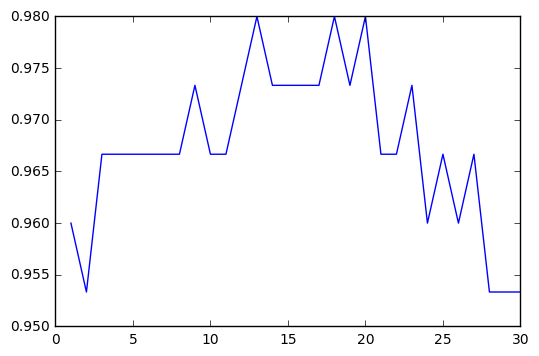

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# fetch data first
X = load_iris().data
#X = preprocessing.scale(X)
y = load_iris().target

k_range = range(1,31)
k_scores = []

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    k_scores.append(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())
    
print(k_scores)

# plotting
plt.plot(k_range, k_scores)

#### The following will be done in XGBoost
- the dataset will be taken from Mushroom dataset

In [11]:
import xgboost as xgb
from pprint import pprint

# for reproducibility, if you don't want this, you could use time.time() to get different value every time
seed = 123
np.random.seed(seed)

dtrain = xgb.DMatrix('../../data/agaricus.txt.train')
dtest  = xgb.DMatrix('../../data/agaricus.txt.test')

# train parameters - we are going to use 5 decision tree stumps with average learning rate.
# the defaul error metric is 'error'
params = {'objective' : 'binary:logistic',
          'max_depth' : 2,
          'silent' : 1,
          'eta' : 0.5}
num_rounds = 5
watch_list = [(dtest, 'eval'), (dtrain, 'train')]

# training
bst = xgb.train(params, dtrain, num_rounds, watch_list)

[0]	eval-error:0.042831	train-error:0.046522
[1]	eval-error:0.039727	train-error:0.043605
[2]	eval-error:0.024829	train-error:0.023338
[3]	eval-error:0.027312	train-error:0.028251
[4]	eval-error:0.011794	train-error:0.011823


### let's change the error metric to logloss

In [12]:
params['eval_metric'] = 'logloss'
bst = xgb.train(params, dtrain, num_rounds, watch_list)

[0]	eval-logloss:0.377093	train-logloss:0.380598
[1]	eval-logloss:0.245811	train-logloss:0.247331
[2]	eval-logloss:0.174941	train-logloss:0.175047
[3]	eval-logloss:0.124244	train-logloss:0.122301
[4]	eval-logloss:0.089699	train-logloss:0.089889


### we could use multiple error metrics

In [13]:
params['eval_metric'] = ['auc', 'map']
bst = xgb.train(params, dtrain, num_rounds, watch_list)

[0]	eval-auc:0.960373	eval-map:0.98915	train-auc:0.958228	train-map:0.966873
[1]	eval-auc:0.992342	eval-map:0.991732	train-auc:0.99115	train-map:0.989131
[2]	eval-auc:0.996324	eval-map:0.995753	train-auc:0.995134	train-map:0.995014
[3]	eval-auc:0.998298	eval-map:0.998303	train-auc:0.99819	train-map:0.998176
[4]	eval-auc:0.999339	eval-map:0.999292	train-auc:0.999085	train-map:0.999081


### Creating custom evaluation metric
In order to create our own evaluation metric, the only thing needed to do is to create a method taking two arguments - ***predicted probabilities*** and ***DMatrix*** objet holding training data

In this example, our classification metric will simply count the number of mis-classified examples assuming that classes with p > 0.5 are positive. You can change this threshold if you want more certainty

The algorithm is getting better when the number of mis-classified examples is getting lower. Remember to also set the argument ***maximize=False*** while training

In [14]:
def misclassified(pred_probs, dtrain):
    labels = dtrain.get_label()   # obtain true labels
    preds  = pred_probs > 0.5     # obtain predicted values
    return 'misclassified', np.sum(labels != preds)

params['eval_metric'] = []
# the argument order is important! if you switch them, you will get error messages
bst = xgb.train(params, dtrain, num_rounds, watch_list, feval=misclassified, maximize=False)

[0]	eval-error:0.042831	train-error:0.046522	eval-misclassified:69	train-misclassified:303
[1]	eval-error:0.039727	train-error:0.043605	eval-misclassified:64	train-misclassified:284
[2]	eval-error:0.024829	train-error:0.023338	eval-misclassified:40	train-misclassified:152
[3]	eval-error:0.027312	train-error:0.028251	eval-misclassified:44	train-misclassified:184
[4]	eval-error:0.011794	train-error:0.011823	eval-misclassified:19	train-misclassified:77


### Extracting the evaluation results
We can get evaluation scores by declaring a dictionary for holding values and passing it as a parameter for ***evals_result*** argument

In [15]:
evals_results = {}
bst = xgb.train(params, dtrain, num_rounds, watch_list, feval=misclassified, maximize=False, evals_result=evals_results)

[0]	eval-error:0.042831	train-error:0.046522	eval-misclassified:69	train-misclassified:303
[1]	eval-error:0.039727	train-error:0.043605	eval-misclassified:64	train-misclassified:284
[2]	eval-error:0.024829	train-error:0.023338	eval-misclassified:40	train-misclassified:152
[3]	eval-error:0.027312	train-error:0.028251	eval-misclassified:44	train-misclassified:184
[4]	eval-error:0.011794	train-error:0.011823	eval-misclassified:19	train-misclassified:77


In [16]:
# now reuse these scores for other purposes (such as plotting)
pprint(evals_results)

{'eval': {'error': [0.042831, 0.039727, 0.024829, 0.027312, 0.011794],
          'misclassified': [69.0, 64.0, 40.0, 44.0, 19.0]},
 'train': {'error': [0.046522, 0.043605, 0.023338, 0.028251, 0.011823],
           'misclassified': [303.0, 284.0, 152.0, 184.0, 77.0]}}


### Early stopping
There is a nice optimization trick when fitting multiple trees.

You can train the model until the validation score stops improving. Validation error needs to decrease at least every early_stopping_rounds to continue training. This approach results in simpler model, because the lowest number of trees will be found (simplicity).

In the following example a total number of 1500 trees is to be created, but we are telling it to stop if the validation score does not improve for last ten iterations.

In [17]:
num_rounds = 1500
params['eval_metric'] = 'error'

bst = xgb.train(params, dtrain, num_rounds, watch_list, early_stopping_rounds=10)

[0]	eval-error:0.042831	train-error:0.046522
Multiple eval metrics have been passed: 'train-error' will be used for early stopping.

Will train until train-error hasn't improved in 10 rounds.
[1]	eval-error:0.039727	train-error:0.043605
[2]	eval-error:0.024829	train-error:0.023338
[3]	eval-error:0.027312	train-error:0.028251
[4]	eval-error:0.011794	train-error:0.011823
[5]	eval-error:0.019863	train-error:0.015968
[6]	eval-error:0.001862	train-error:0.001996
[7]	eval-error:0.013656	train-error:0.010134
[8]	eval-error:0.001862	train-error:0.001996
[9]	eval-error:0	train-error:0.001228
[10]	eval-error:0.001862	train-error:0.001996
[11]	eval-error:0	train-error:0.001228
[12]	eval-error:0.001862	train-error:0.001996
[13]	eval-error:0	train-error:0.001228
[14]	eval-error:0	train-error:0.001228
[15]	eval-error:0	train-error:0.001228
[16]	eval-error:0	train-error:0.001228
[17]	eval-error:0	train-error:0.001228
[18]	eval-error:0	train-error:0.001228
[19]	eval-error:0	train-error:0.001228
Stoppi

When using early_stopping_rounds parameter, the resulting model will have 3 additional fields - ***bst.best_score***, ***bst.best_iteration*** and ***bst.best_ntree_limit***

- Note: train() will return a model from the last iteration, not the best one

In [18]:
print("Booster best train score: {}".format(bst.best_score))
print("Booster best iteration: {}".format(bst.best_iteration))
print("Booster best number of trees limit: {}".format(bst.best_ntree_limit))

Booster best train score: 0.001228
Booster best iteration: 9
Booster best number of trees limit: 10


### Cross validating results
Native XGBoost package provides an option for cross-validating results (but not as sophisticated as sklearn package). 

The next input shows a basic execution. 

***Notice that we are passing only single DMatrix, so it would be good to merge train and test into one object to have more training samples***
- by default, we get a pandas data frame object (can be changed with as_pandas param)
- metrics are passed as an argument (multiple values are allowed)
- we can use own evaluation metrics (param feval and maximize)

In [19]:
num_rounds = 10   # how many estimators

hist = xgb.cv(params, dtrain, num_rounds, nfold=10, metrics={'error'}, seed=seed)
hist

,test-error-mean,test-error-std,train-error-mean,train-error-std
0,0.046544,0.010688,0.046544,0.001187
1,0.047312,0.010231,0.045161,0.001706
2,0.023349,0.006437,0.023349,0.000715
3,0.028264,0.008047,0.028264,0.000894
4,0.011828,0.003298,0.011828,0.000366
5,0.015975,0.004301,0.015975,0.000478
6,0.001997,0.001690,0.001997,0.000188
7,0.010138,0.002849,0.010138,0.000317
8,0.001997,0.001690,0.001997,0.000188
9,0.001843,0.001791,0.001843,0.000294


## Hyper-parameter tuning more
- many parameters are tunable. Each one results in different output. The question is which conbination produces best results.
- scikit-learn provides a lot of such modules for us to use!

In [21]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
# Note: from sklearn.cross_validation import StratifiedKFold has been deprecated

from scipy.stats import randint, uniform
seed = 342  # fixed seed makes results reproducible
np.random.seed(seed)

# generate artificial dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=8, n_redundant=3, n_repeated=2, random_state=seed)

Define cross-validation strategy for testing. Let's use ***StratifiedKFold*** which guarantees that target labels are equally distributed across each fold.

In [22]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cv.get_n_splits(X, y)

10

### Grid Search
In grid-search, we start by defining a dictionary holding possible parameter values we want to test. 
- All combinations will be evaluated

In [23]:
params_grid = { 'max_depth' : [1,2,3], 
                'n_estimators' : [5, 10, 25, 50],
                'learning_rate' : np.linspace(1e-16, 1, 3)}

#### add a dictionary for fixed parameters

In [24]:
params_fixed = { 'objective' : 'binary:logistic',
                 'silent' : 1}

Create a GridSearchCV estimator, We will be looking for combination giving the best accuracy

In [25]:
bst_grid = GridSearchCV( estimator=XGBClassifier(**params_fixed, seed=seed),
                         param_grid=params_grid,
                         cv=cv,
                         scoring='accuracy')

Before running the calculations, notice that we will have 3 \* 4 \* 3 \* 10 = 360 models created to test all combinations.
- you should always have rough estimations about what is going to happen

In [26]:
bst_grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=342, shuffle=True),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=342, silent=1, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': array([  1.00000e-16,   5.00000e-01,   1.00000e+00]), 'n_estimators': [5, 10, 25, 50], 'max_depth': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

Now, we can look at all obtained scores, and try to manually see what matters and what not, A quick glance looks that the larger n_estimators then the accuracy is higher

In [27]:
bst_grid.grid_scores_

/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.50400, std: 0.00200, params: {'learning_rate': 9.9999999999999998e-17, 'n_estimators': 5, 'max_depth': 1},
 mean: 0.50400, std: 0.00200, params: {'learning_rate': 9.9999999999999998e-17, 'n_estimators': 10, 'max_depth': 1},
 mean: 0.50400, std: 0.00200, params: {'learning_rate': 9.9999999999999998e-17, 'n_estimators': 25, 'max_depth': 1},
 mean: 0.50400, std: 0.00200, params: {'learning_rate': 9.9999999999999998e-17, 'n_estimators': 50, 'max_depth': 1},
 mean: 0.50400, std: 0.00200, params: {'learning_rate': 9.9999999999999998e-17, 'n_estimators': 5, 'max_depth': 2},
 mean: 0.50400, std: 0.00200, params: {'learning_rate': 9.9999999999999998e-17, 'n_estimators': 10, 'max_depth': 2},
 mean: 0.50400, std: 0.00200, params: {'learning_rate': 9.9999999999999998e-17, 'n_estimators': 25, 'max_depth': 2},
 mean: 0.50400, std: 0.00200, params: {'learning_rate': 9.9999999999999998e-17, 'n_estimators': 50, 'max_depth': 2},
 mean: 0.50400, std: 0.00200, params: {'learning_rate': 9.99999999

In [28]:
bst_grid.cv_results_

{'mean_fit_time': array([ 0.00446646,  0.00655363,  0.01313214,  0.02412491,  0.00617661,
         0.00992792,  0.02188349,  0.0414077 ,  0.00786338,  0.01367953,
         0.03103051,  0.05946367,  0.00432563,  0.00665994,  0.01350579,
         0.02450576,  0.00612512,  0.01017241,  0.02198834,  0.04201226,
         0.00807309,  0.01389258,  0.03112109,  0.05917735,  0.00442333,
         0.00683696,  0.01383007,  0.02515924,  0.00625587,  0.01035583,
         0.02225537,  0.04163256,  0.00801852,  0.01381564,  0.03044968,
         0.05619001]),
 'mean_score_time': array([ 0.00036659,  0.00036576,  0.00040791,  0.00049007,  0.00037279,
         0.00038493,  0.00050042,  0.00049839,  0.00042319,  0.0004364 ,
         0.00043237,  0.00050459,  0.00034852,  0.00036247,  0.00040078,
         0.00042958,  0.00034518,  0.00036237,  0.00043192,  0.00061283,
         0.00037129,  0.00042477,  0.00055037,  0.00065746,  0.0003479 ,
         0.00035708,  0.00041983,  0.0004303 ,  0.0003547 ,  0.00

If there are too many results, we can filter them manually to get the best combination
- Note: looking for best parameters is an iterative process. You should start with coarsed-granularity and move to more detailed values.

In [29]:
print("Best accuracy obtained: {0}".format(bst_grid.best_score_))
print("Parameters")
for key, value in bst_grid.best_params_.items():
    print("\t{}: {}".format(key, value))

Best accuracy obtained: 0.872
Parameters
	learning_rate: 0.5
	n_estimators: 50
	max_depth: 3


### Randomized Grid-Search
when the number of parameters and their values is getting big, the traditional grid-search approach quickly becomes ineffective.
- A possible solution might be to randomly pick certain parameters from their distribution. While it's not an exhaustive solution, it's worth giving a shot!

In [30]:
# Create a parameters distribution dictionary:
params_dist_grid = { 'max_depth' : [1, 2, 3, 4],
                     'gamma' : [0, 0.5, 1],
                     'n_estimators' : randint(1, 1001),   # uniform discrete random distribution
                     'learning_rate' : uniform,           # gaussain distribution
                     'subsample' : uniform(),             # gaussain distribution
                     #'colsample_bytree' : uniform()       # gaussain distribution
                   }

Initialize ***RandomizedSearchCV*** to randomly pick 10 combinations of parameters. 
- with this approach you can easily control the number of tested models

In [31]:
rs_grid = RandomizedSearchCV( estimator=XGBClassifier(**params_fixed, seed=seed),
                              param_distributions=params_dist_grid,
                              n_iter=10,
                              scoring='accuracy',
                              cv = cv,
                              random_state=seed)

# Train the classifier
rs_grid.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=342, shuffle=True),
          error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=342, silent=1, subsample=1),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f47a802e978>, 'learning_rate': <scipy.stats._continuous_distns.uniform_gen object at 0x7f47afa20400>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f47a802e630>, 'max_depth': [1, 2, 3, 4], 'gamma': [0, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=342, refit=True,
          return_train_score=True, scoring='accuracy', verbose=0)

There are also some handy properties allowing to quickly analyze best estimator, parameters and obtained score

In [32]:
rs_grid.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=1, learning_rate=0.25244657272498761, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=541,
       nthread=-1, objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=342, silent=1,
       subsample=0.47402131267540315)

In [33]:
rs_grid.best_params_

{'gamma': 1,
 'learning_rate': 0.25244657272498761,
 'max_depth': 2,
 'n_estimators': 541,
 'subsample': 0.47402131267540315}

In [34]:
rs_grid.best_score_

0.86299999999999999